# Map statistics of objects in one channel in relation to overlapping objects in another channel

This notebook shows how to measure features of segmentated objects arising from multichannel images. It shows the similar steps done via the "Regionprops Map Multichannel" plugin module, but here these are applied by calling different functions. 

It shows how to do that in the following ways:

1. **measure_labels**: Get features from on one segmented image (it needs one label image);
    
2. **measure_labels_with_intensity**: Get features (including intensity) from one segmented image and one intensity image (it needs one label image and one intensity image);

3. **link_two_label_images**: Get which objects from one segmented image "belong" to another reference image.
    
4. **measure_labels_in_labels**: Get features from two segmented images, relating objects from one image to another image (it needs two label images, one being a reference);
    
5. **measure_labels_in_labels_with_intensity**: Get features (including intensity features) from two segmented images and two intensity images (it needs two label images and two intensity images);

6. **measure_summary_statistics**: Transforms a table to return summary statistics instead of individual relationships.


We start by loading the same cropped images from the [BBBC007 dataset](https://bbbc.broadinstitute.org/BBBC007): two label images and two intensity images.

In [1]:
from skimage import io
import numpy as np
import pandas as pd
import napari
from napari.utils import nbscreenshot
from napari_skimage_regionprops import measure_labels, measure_labels_with_intensity, measure_labels_in_labels, measure_labels_in_labels_with_intensity, link_two_label_images, make_summary_table
from napari_skimage_regionprops import regionprops_table

In [2]:
image_channel1 = io.imread('../data/actin.tif')
image_channel2 = io.imread('../data/dna.tif')
cell_labels = io.imread('../data/cell_labels.tif')
dna_labels = io.imread('../data/dna_labels.tif')

In [3]:
viewer = napari.Viewer()

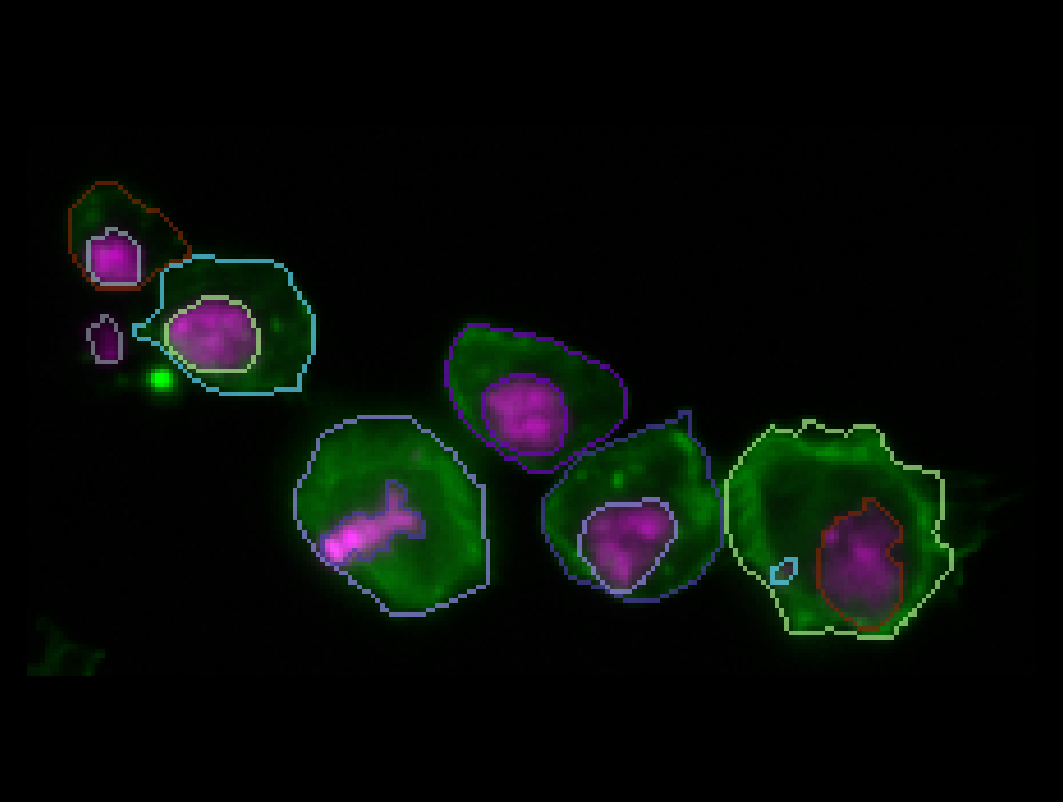

In [4]:
viewer.add_image(image_channel1, name = 'dna', colormap='green')
viewer.add_image(image_channel2, name = 'dna', colormap='magenta', blending='additive')
cell_labels_layer = viewer.add_labels(cell_labels)
cell_labels_layer.contour = 1
dna_labels_layer = viewer.add_labels(dna_labels)
dna_labels_layer.contour = 1
# viewer.grid.enabled = True
nbscreenshot(viewer, canvas_only=True)

## 1. Measure Lables

To measure cell size features from one label image, we can use the function `measure_labels` providing the labeled image as an argument. By doing that, we get a table with size and shape properties.

In [5]:
measurements = measure_labels(label_image_reference=cell_labels)
measurements

,label,area,bbox_area,convex_area,equivalent_diameter
0,1,442,648,461,23.722813
1,2,910,1240,972,34.038919
2,3,1407,1892,1452,42.325501
3,4,911,1320,941,34.057616
4,5,1185,1680,1231,38.843131
5,6,1803,2400,1919,47.912951


Extra properties can be provided to get other features like `shape`.

In [6]:
measurements = measure_labels(label_image_reference=cell_labels, shape=True)
measurements

,label,area,bbox_area,convex_area,equivalent_diameter,solidity,extent,feret_diameter_max,local_centroid-0,local_centroid-1,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity
0,1,442,648,461,23.722813,0.958785,0.682099,28.792360,12.248869,11.158371,26.534396,21.946451,1.114467,0.562063,1.209052,0.799308,0.884261
1,2,910,1240,972,34.038919,0.936214,0.733871,40.607881,15.034066,21.548352,38.480267,30.581397,1.219138,0.606964,1.258290,0.782484,0.820115
2,3,1407,1892,1452,42.325501,0.969008,0.743658,49.040799,21.185501,21.783937,47.789939,37.707490,0.739053,0.614360,1.267386,0.784389,0.863983
3,4,911,1320,941,34.057616,0.968119,0.690152,42.154478,15.396268,18.670692,41.248159,28.712921,1.186024,0.717943,1.436571,0.681741,0.856081
4,5,1185,1680,1231,38.843131,0.962632,0.705357,45.486262,22.182278,20.661603,41.268687,37.257503,-0.896798,0.430054,1.107661,0.885905,0.833792
5,6,1803,2400,1919,47.912951,0.939552,0.751250,53.851648,23.469773,24.153078,52.248724,44.392437,0.893456,0.527368,1.176974,0.840920,0.770883


This function calls `regionprops_table` function from `napari-skimage-regionprops` under the hood, but it does not need an intensity image in this case.

In [7]:
measurements = regionprops_table(image=np.zeros_like(cell_labels), labels=cell_labels, intensity=False)
measurements

,label,area,bbox_area,convex_area,equivalent_diameter
0,1,442,648,461,23.722813
1,2,910,1240,972,34.038919
2,3,1407,1892,1452,42.325501
3,4,911,1320,941,34.057616
4,5,1185,1680,1231,38.843131
5,6,1803,2400,1919,47.912951


## 2. Measure cell intensity features

To also include intensity features, we use the `measure_labels_with_intensity` function, which needs a label image and an intensity single-channel image.

In [8]:
measurements_with_intensity = measure_labels_with_intensity(
    label_image_reference=cell_labels,
    intensity_image_reference=image_channel1
)
measurements_with_intensity

,label,area,bbox_area,convex_area,equivalent_diameter,max_intensity,mean_intensity,min_intensity,standard_deviation_intensity
0,1,442,648,461,23.722813,64.0,23.988688,9.0,10.084142
1,2,910,1240,972,34.038919,96.0,42.542857,16.0,14.954136
2,3,1407,1892,1452,42.325501,128.0,72.480455,24.0,16.704404
3,4,911,1320,941,34.057616,105.0,45.803513,14.0,16.341103
4,5,1185,1680,1231,38.843131,135.0,51.278481,20.0,19.006819
5,6,1803,2400,1919,47.912951,136.0,56.301165,16.0,24.383326


## 3. Link each cell to objects in another channel

To get the relationship of each labeled object in one label image (reference) to other labeled objects in a second label image, we can use the `link_two_label_images` function.

In [9]:
labels_relationship = link_two_label_images(
    label_image_reference=cell_labels,
    labels_to_measure=dna_labels
)
labels_relationship

,label_reference,label
0,0,8
1,1,7
2,2,6
3,3,5
4,4,4
5,5,3
6,6,1
7,6,2


This tells us the object with label `8` from the DNA labels 'belongs' to the background of the cell labels (label `0`).

Also, that the object `7` from the DNA labels 'belongs' to the cell with label `1`.

To understand in more detail how an object is considered to belong to another, please refer to the [´intersection_over_reference_area_explained´ notebook](https://github.com/haesleinhuepf/napari-skimage-regionprops/tree/master/demo/intersection_over_reference_area_explained.ipynb).

## 4. Link each cell with its features to objects in another channel also with their features

To get not only the label relationships shown above, but also to get the corresponding properties in a same table, we can use the `measure_labels_in_labels` function. We can optionally provide `suffixes` to better identify the sources, otherwise '_reference' and numbers will be used.

In [10]:
measurements_linked = measure_labels_in_labels(label_image_reference=cell_labels,
                                                labels_to_measure=dna_labels,
                                                suffixes=['_cells', '_dna'])
measurements_linked

z:\programming\github\napari-skimage-regionprops\napari_skimage_regionprops\_process_tables.py:54: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(output_table,


,label_cells,area_cells,bbox_area_cells,convex_area_cells,equivalent_diameter_cells,label_dna,area_dna,bbox_area_dna,convex_area_dna,equivalent_diameter_dna
0,1,442.0,648.0,461.0,23.722813,7,130,156,135,12.865502
1,2,910.0,1240.0,972.0,34.038919,6,283,357,293,18.982276
2,3,1407.0,1892.0,1452.0,42.325501,5,210,437,271,16.351768
3,4,911.0,1320.0,941.0,34.057616,4,275,342,284,18.712052
4,5,1185.0,1680.0,1231.0,38.843131,3,329,462,345,20.466944
5,6,1803.0,2400.0,1919.0,47.912951,1,413,551,437,22.931374
6,6,1803.0,2400.0,1919.0,47.912951,2,28,36,29,5.970821
7,0,NaN,NaN,NaN,NaN,8,66,88,70,9.166996


This table provides direct relationships, so some labels may show up duplicated. To have unique labels in the first column, we should later apply the `make_summary_table` function explained in the last section of this notebook.

## 5. Link each cell with its features (including intensity features) to objects in another channel also with their features

To also include intensity features, we use the function `measure_labels_in_labels_with_intensity`, which needs the corresponding intensity images as extra parameters.

In [11]:
measurements_with_intensity_linked = measure_labels_in_labels_with_intensity(label_image_reference=cell_labels,
                                                                intensity_image_reference=image_channel1,
                                                                labels_to_measure=dna_labels,
                                                                intensity_image_of_labels_to_measure=image_channel2,
                                                                suffixes=['_cells', '_dna'])
measurements_with_intensity_linked

z:\programming\github\napari-skimage-regionprops\napari_skimage_regionprops\_process_tables.py:54: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(output_table,


,label_cells,area_cells,bbox_area_cells,convex_area_cells,equivalent_diameter_cells,max_intensity_cells,mean_intensity_cells,min_intensity_cells,standard_deviation_intensity_cells,label_dna,area_dna,bbox_area_dna,convex_area_dna,equivalent_diameter_dna,max_intensity_dna,mean_intensity_dna,min_intensity_dna,standard_deviation_intensity_dna
0,1,442.0,648.0,461.0,23.722813,64.0,23.988688,9.0,10.084142,7,130,156,135,12.865502,183.0,104.346154,19.0,40.762674
1,2,910.0,1240.0,972.0,34.038919,96.0,42.542857,16.0,14.954136,6,283,357,293,18.982276,182.0,99.568905,28.0,34.877849
2,3,1407.0,1892.0,1452.0,42.325501,128.0,72.480455,24.0,16.704404,5,210,437,271,16.351768,247.0,127.585714,24.0,55.615558
3,4,911.0,1320.0,941.0,34.057616,105.0,45.803513,14.0,16.341103,4,275,342,284,18.712052,173.0,96.658182,23.0,37.846574
4,5,1185.0,1680.0,1231.0,38.843131,135.0,51.278481,20.0,19.006819,3,329,462,345,20.466944,161.0,79.708207,10.0,32.925170
5,6,1803.0,2400.0,1919.0,47.912951,136.0,56.301165,16.0,24.383326,1,413,551,437,22.931374,132.0,58.987893,14.0,24.761279
6,6,1803.0,2400.0,1919.0,47.912951,136.0,56.301165,16.0,24.383326,2,28,36,29,5.970821,56.0,35.607143,13.0,11.564537
7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,66,88,70,9.166996,94.0,46.030303,22.0,17.076450


Currently, background feature calculation is not implemented, so NaN are returned for it.

## 6. Get individual cell summary statistics for each feature

To get summary statistics instead of individual direct relationships, we can use the `make_linked_summary` function. We must provide as input the direct relationships table and a list of statistics. 

Below, we provide 'count' and 'mean'. So, for each cell label, we get the number of objects 'inside' it and the mean of `size` features, like mean area of the dna objects inside.

In [12]:
measurements_linked_summary = make_summary_table(measurements_linked,
                                                statistics_list=['count', 'mean'])
measurements_linked_summary

,label_cells,counts_dna,area_dna mean,bbox_area_dna mean,convex_area_dna mean,equivalent_diameter_dna mean
0,0,1,66.0,88.0,70.0,9.166996
1,1,1,130.0,156.0,135.0,12.865502
2,2,1,283.0,357.0,293.0,18.982276
3,3,1,210.0,437.0,271.0,16.351768
4,4,1,275.0,342.0,284.0,18.712052
5,5,1,329.0,462.0,345.0,20.466944
6,6,2,220.5,293.5,233.0,14.451098
